In [1]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [5]:
dtypes = df.dtypes
dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [6]:
n_unique = df.nunique()
n_unique

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [7]:
pd.DataFrame({ 'DataType': dtypes, 'NumUnique': n_unique}).T


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
DataType,int64,int64,object,float64,int64,int64,float64,object,object
NumUnique,2,3,2,88,7,7,248,147,3


In [8]:
def chek_type(data):
    dtypes = df.dtypes
    n_unique = df.nunique()
    return pd.DataFrame({ 'DataType': dtypes, 'NumUnique': n_unique}).T
chek_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
DataType,int64,int64,object,float64,int64,int64,float64,object,object
NumUnique,2,3,2,88,7,7,248,147,3


In [9]:
cols = ['Pclass',
        'Sex',
        'SibSp',
        'Parch',
        'Survived',
        'Embarked']
df[cols] = df[cols].astype('category')
chek_type(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
DataType,category,category,category,float64,category,category,float64,object,category
NumUnique,2,3,2,88,7,7,248,147,3


In [10]:
null = df.isnull().sum()
null

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
df.shape[0]

891

In [12]:
ratio = (null / df.shape[0]) * 100
pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio (%),0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [13]:
def check_null(data):
    null = data.isnull().sum()
    ratio = (null / data.shape[0]) * 100
    return pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T
check_null(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Null,0.0,0.0,0.0,177.00000,0.0,0.0,0.0,687.000000,2.000000
Ratio (%),0.0,0.0,0.0,19.86532,0.0,0.0,0.0,77.104377,0.224467


In [14]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)


In [15]:
df.dropna(subset=['Embarked'],inplace=True)


In [16]:
df = df.drop('Cabin', axis=1)

In [17]:
def check_null(data):
    null = data.isnull().sum()
    ratio = (null / data.shape[0]) * 100
    return pd.DataFrame({"Null": null, "Ratio (%)": ratio}).T
check_null(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Null,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ratio (%),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


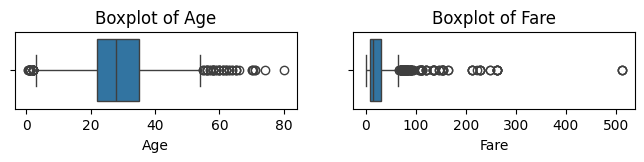

In [18]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Boxplot of {col}')
   

In [19]:
for col in num_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    lower_outliers = df[df[col] < lower_bound].values
    upper_outliers = df[df[col] > upper_bound].values

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


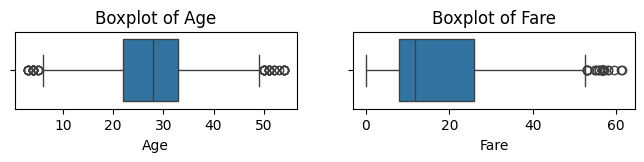

In [20]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(8, 1))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.boxplot(df[col],orient='h')
    plt.title(f'Boxplot of {col}')
   

In [21]:
df.duplicated().sum()

np.int64(108)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.duplicated().sum()

np.int64(0)

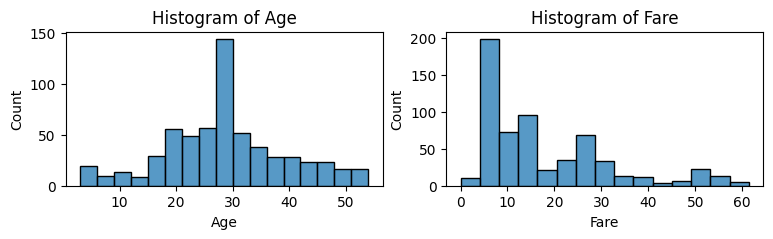

In [24]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.histplot(df[col])
    plt.title(f'Histogram of {col}')

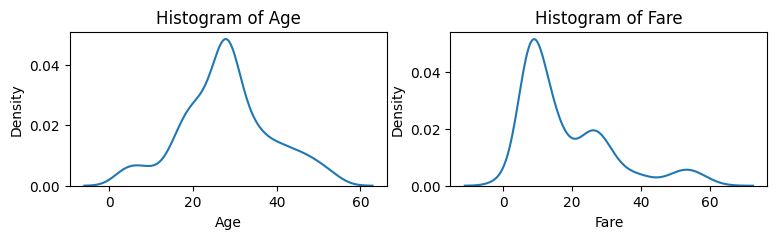

In [25]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(9, 2))
for i, col in enumerate(num_cols):
    plt.subplot(1, len(num_cols), i + 1)
    sns.kdeplot(df[col])
    plt.title(f'Histogram of {col}')

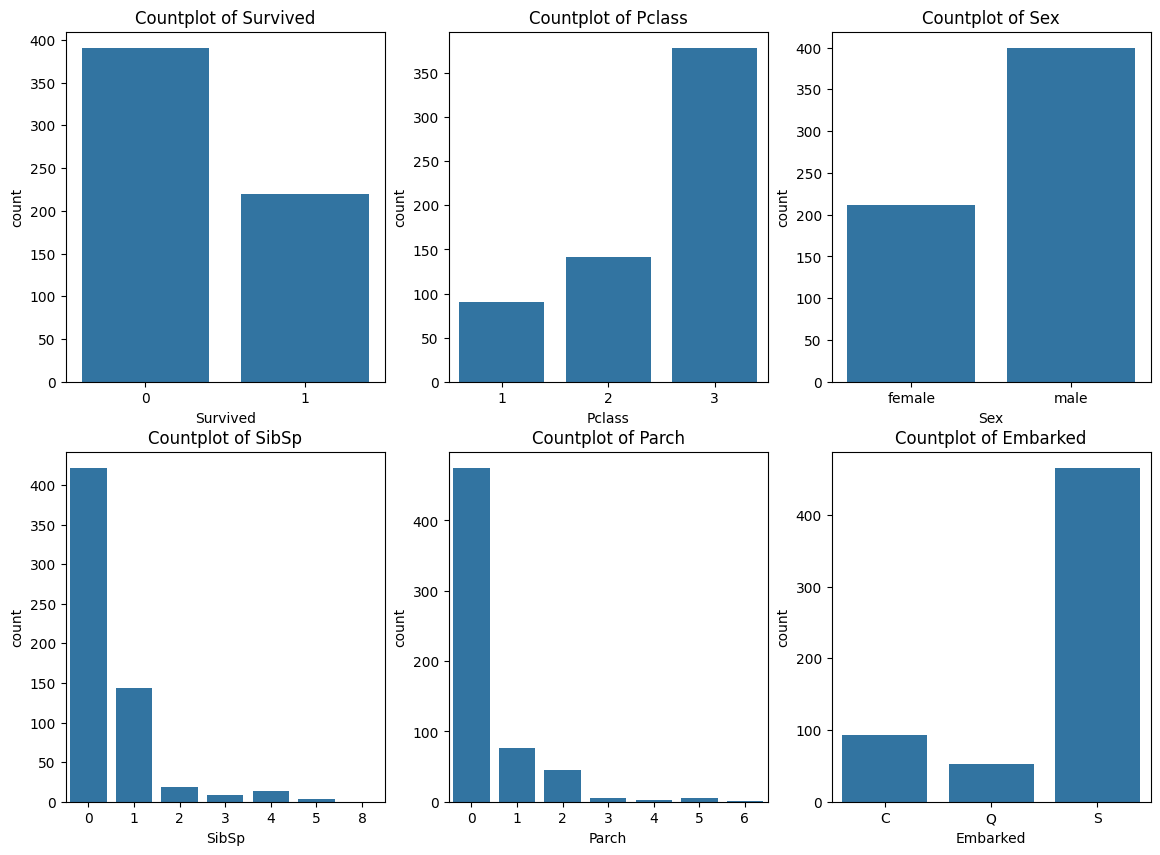

In [26]:
cat_cols = df.select_dtypes(include=['category']).columns
plt.figure(figsize=(14, 10))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=df[col])
    plt.title(f'Countplot of {col}')

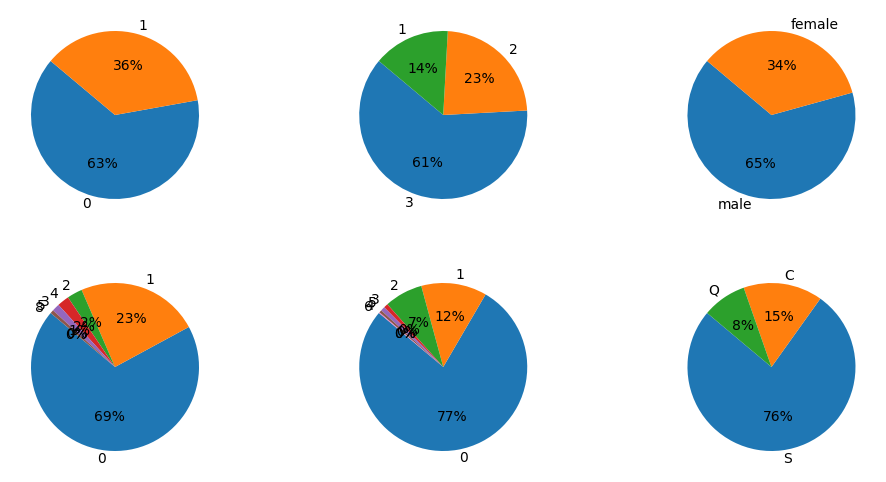

In [27]:
cat_cols = df.select_dtypes(include=['category']).columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    unique_counts = df[col].value_counts()
    count = unique_counts.values
    categories = unique_counts.index
    plt.pie(count, labels=categories, autopct='%1.1d%%', startangle=140)
    

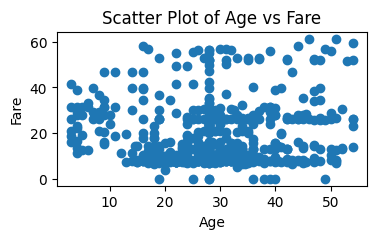

In [28]:
plt.figure(figsize=(4, 2))
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot of Age vs Fare')
plt.show()

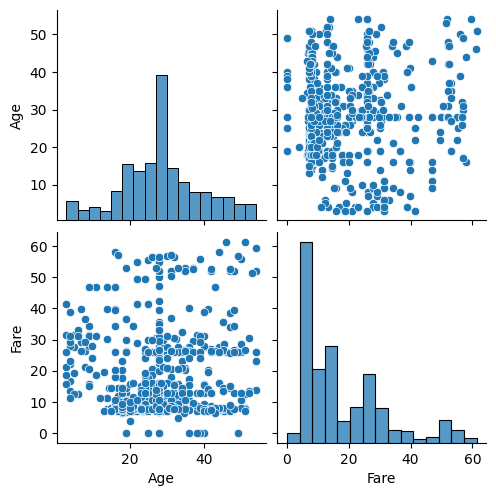

In [29]:
sns.pairplot(df)

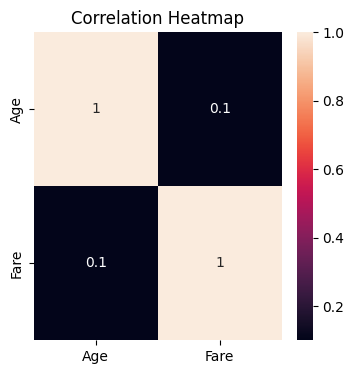

In [42]:
correlation = df[num_cols].corr()
plt.figure(figsize=(4, 4))
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

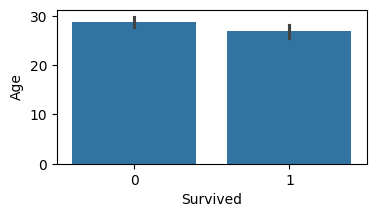

In [49]:
plt.figure(figsize=(4, 2))
sns.barplot(x='Survived', y='Age', data=df)
plt.show()

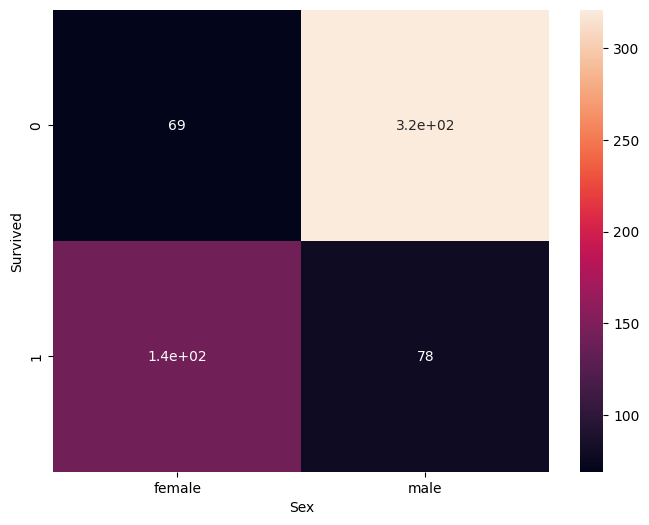

In [55]:
plt.figure(figsize=(8, 6))
agg = df.pivot_table(index='Survived', columns='Sex', values='Age', aggfunc=len)
sns.heatmap(agg, annot=True)
plt.show()